In [1]:
# import the movielens full dataset from ./ml-latest/ml-latest/ratings.csv
import pandas as pd

ratings = pd.read_csv('ml-latest/ml-latest/ratings.csv')

print(ratings.head())
print(ratings.shape)

   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
(33832162, 4)


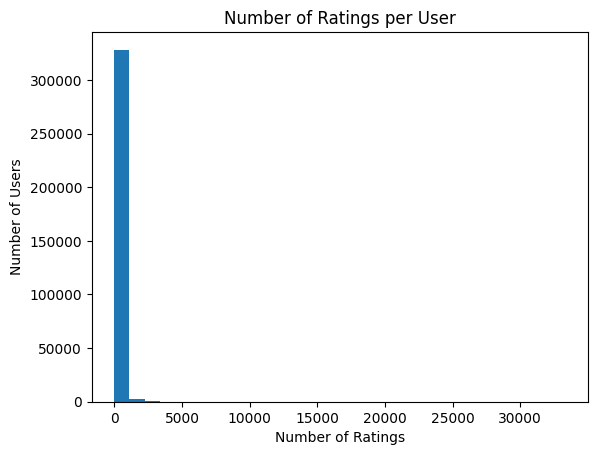

In [2]:
# graph the number of ratings (x) and how many users rated that many movies (y)
import matplotlib.pyplot as plt

ratings['userId'].value_counts().plot(kind='hist', bins=30)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Number of Ratings per User')
plt.show()

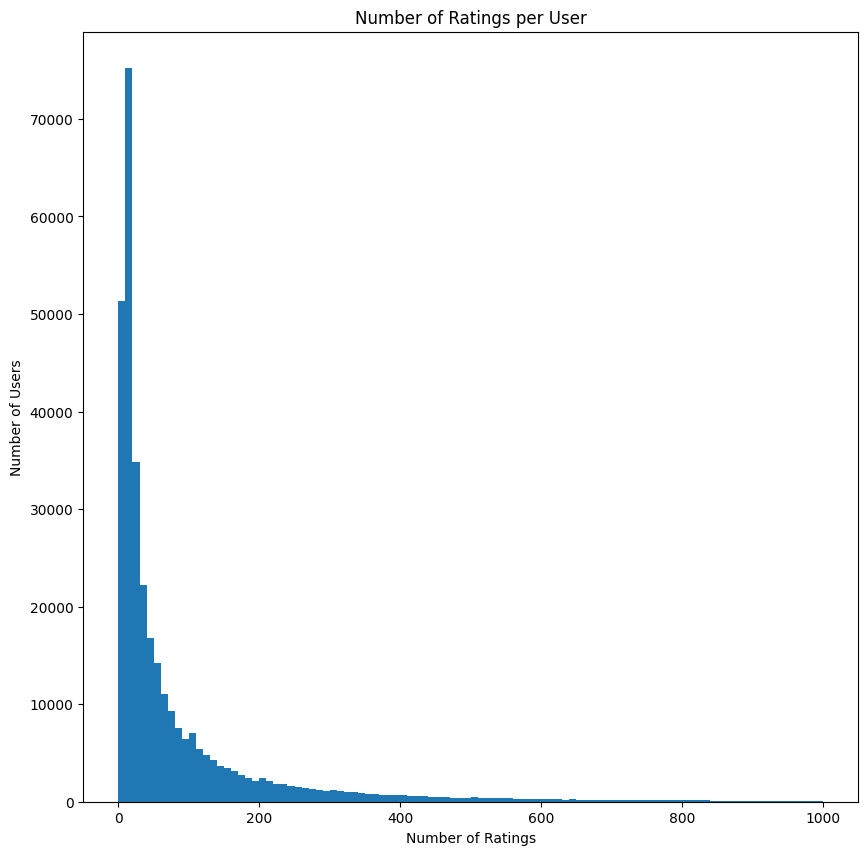

In [3]:
# limit the graph to 1000 ratings
ratings['userId'].value_counts().plot(kind='hist', bins=100, range=(0,1000), figsize=(10,10))
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Number of Ratings per User')
plt.show()

Because of the massive amount of ratings, we need to limit the user that we include in our dataset, it is probably unwise to include users that have rated less than 100 movies. This is because we want to make sure that the user has rated enough movies to make the recommendation system work.

In [4]:
# we probably want to limit the dataset to movies and users that have a certain number of ratings
# here, based on my experiment, I'm going to limit the dataset to users who have rated between 300 and 500 movies
# and movies that have been rated at least 50 times, which cuts the dataset to a more manageable size
user_counts = ratings['userId'].value_counts()
rating_counts = ratings['movieId'].value_counts()
ratings = ratings[ratings['movieId'].isin(rating_counts[(rating_counts >= 50)].index)]
ratings = ratings[ratings['userId'].isin(user_counts[(user_counts >= 300) & (user_counts < 500)].index)]

In [5]:
print("There are {} unique users in the ratings list".format(ratings['userId'].nunique()))
print("There are {} unique movies in the ratings list".format(ratings['movieId'].nunique()))
print("There are {} ratings in the ratings list".format(ratings.shape[0]))

There are 13839 unique users in the ratings list
There are 16103 unique movies in the ratings list
There are 5238547 ratings in the ratings list


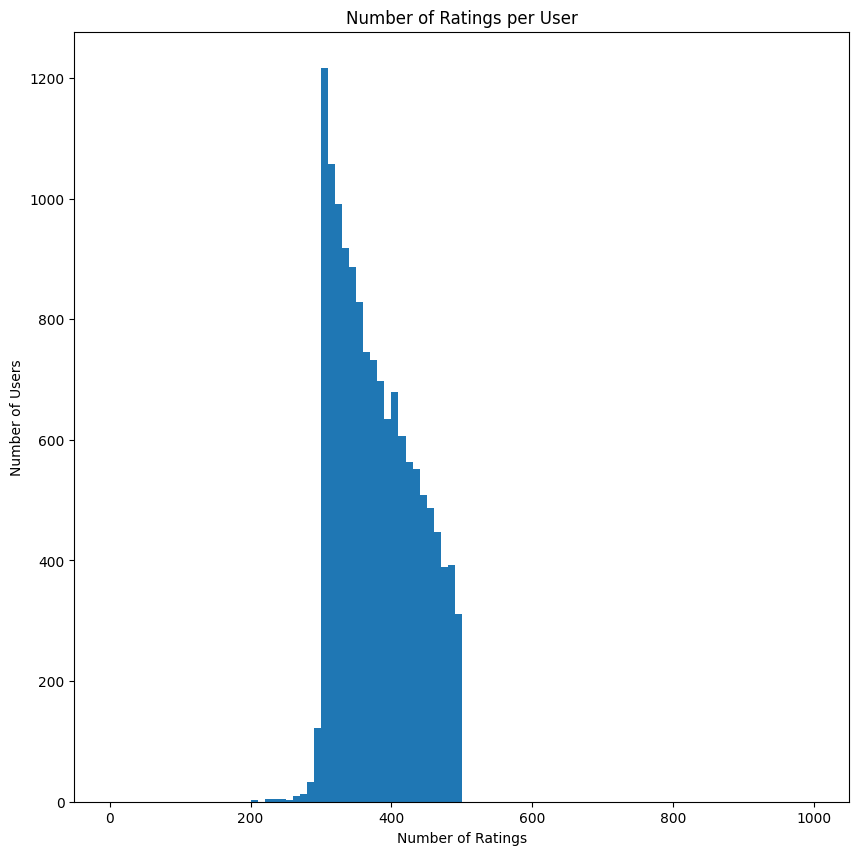

In [6]:
ratings['userId'].value_counts().plot(kind='hist', bins=100, range=(0,1000), figsize=(10,10))
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Number of Ratings per User')
plt.show()

In [7]:
# create the user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.shape

(13839, 16103)

The above pivot table takes 1GB of memory:

13839 * 16103 * 8 = 1782795336 bytes = 1.78 GB

In [9]:
# export the relevent ratings, movies and links to csv files (only the ones that are in the user-item matrix)
import os
base_path = 'ml-latest-filtered/ml-latest-filtered/'
if not os.path.exists('ml-latest-filtered'):
    os.makedirs('ml-latest-filtered')
if not os.path.exists(base_path):
    os.makedirs(base_path)
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.to_csv(base_path + 'ratings.csv', index=False)

movies = pd.read_csv('ml-latest/ml-latest/movies.csv')
movies = movies[movies['movieId'].isin(user_item_matrix.columns)]
movies.to_csv(base_path + 'movies.csv', index=False)

links = pd.read_csv('ml-latest/ml-latest/links.csv')
links = links[links['movieId'].isin(user_item_matrix.columns)]
links.to_csv(base_path + 'links.csv', index=False)